# E-tivity 2 (10/02/25 - 23/02/25)

* Sean Noonan

* 23300159

## Outline

This e-tivity is split into two parts. The first part <a href="#part1">**Stock Predicition**</a> is a group activity where you are tasked with predicting the stock market.

The second <a href="#part2">**Sentiment Analysis**</a> is an individual task, the problem is to predict if a film review is positive or negative.

### Guidelines

The e-tivity is split into five tasks. The first four are "group" excersises, in that you post the solutions to Tasks 1-4 to the Group Locker. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Brightspace.

Marks will be deducted if task 5 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-5 and with correct identification or filename.


Grading guidelines: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2621&originTool=quicklinks




<a id='part1'></a>
## Stock Prediction

### Context

There is a small dataset of real stock prices for each working day from the end of 2015 to the end of 2019. There are four variables (with a time stamp), stock price, oil price, gold price and Euro to Dollar exchange. You need to predict the Stock price a day ahead from only the past values of each of the 4 variables. 


### Tasks 1-4 (complete by Sunday 16/02/25)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

**Task 1: data preprocessing**

Explain any preprocessing steps you take including but limited to reformatting and also how you have selected the training and test sets. The test set should be 20% of the whole.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./stock.csv")

Lets take a look at the data

In [3]:
# Lets have a look at the data
df.head()

,Date,Stock,Oil,EuroToDollar,Gold
0,2015-11-23,2089.409912,41.490002,0.9432,1124.7
1,2015-11-24,2084.419922,42.040001,0.9388,1131.6
2,2015-11-25,2089.300049,42.689999,0.9420,1128.4
3,2015-11-27,2088.820068,43.250000,0.9438,1114.5
4,2015-11-30,2090.949951,41.770000,0.9468,1123.9


In [4]:
# Print statistical summary for all numerical attributes
df.describe()

,Stock,Oil,EuroToDollar,Gold
count,1033.000000,1023.000000,1021.000000,1033.000000
mean,2537.063011,53.655484,0.883818,1353.312488
std,338.853458,9.799842,0.034394,89.592361
min,1833.400024,27.299999,0.800800,1090.200000
25%,2204.969971,47.594999,0.859700,1303.800000
50%,2584.000000,53.049999,0.887900,1346.500000
75%,2811.350098,60.625000,0.904500,1403.900000
max,3247.229980,76.180000,0.963900,1584.500000


In [5]:
df.columns

Index(['Date', 'Stock', 'Oil', 'EuroToDollar', 'Gold'], dtype='object')

In [14]:
df.dtypes

Date             object
Stock           float64
Oil             float64
EuroToDollar    float64
Gold            float64
dtype: object

In [7]:
numerical_columns = df.select_dtypes(include=['number']).columns
missing_numerical = df[numerical_columns].isnull().sum()

print("Missing values in numerical variables:")
print(missing_numerical)

Missing values in numerical variables:
Stock            0
Oil             10
EuroToDollar    12
Gold             0
dtype: int64


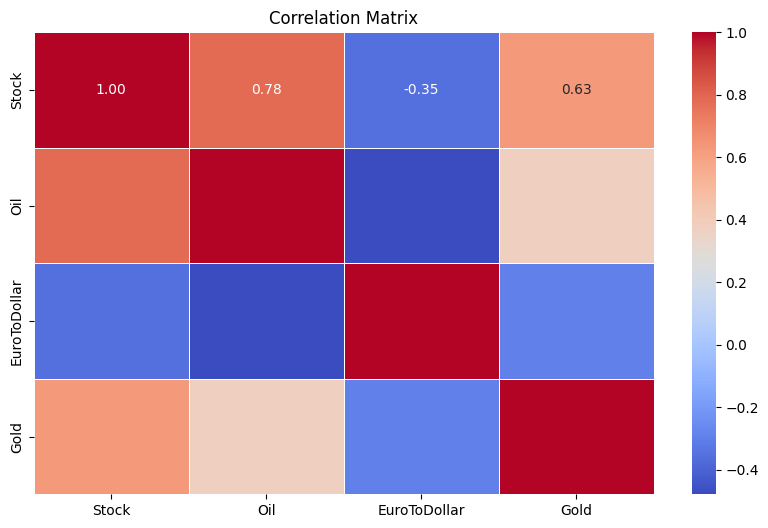

In [15]:
# Compute the correlation matrix
corr_matrix = df.drop(columns=["Date"]).corr()

# Display the matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

<Axes: ylabel='Density'>

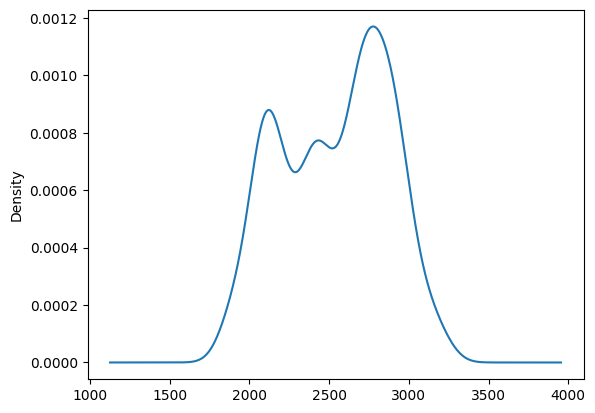

In [10]:
df['Stock'].plot.density()

In [11]:
for column in df.columns:
    print(df[column].nunique(), column) 

1033 Date
1021 Stock
878 Oil
645 EuroToDollar
854 Gold


1033 unique dates

I need to ensure train test split is in sequence

In [63]:
# Split data
train_size = int(len(df) * 0.8)  # 80% train, 20% test
df_train, df_test = df.iloc[:train_size], df.iloc[train_size:]

**Task 2: data cleaning**

There are a number of missing values in the data. Clean the data so that it is suitable for use with the NN. Bare in mind that you want to retain the time coherency of the data as much as possible. Explain the steps you have taken.


In [64]:
# Remove rows with any NaN values for any feature

df_train_c = df_train.dropna()
df_test_c = df_test.dropna()

In [65]:
numerical_columns = df_train_c.select_dtypes(include=['number']).columns
missing_numerical = df_train_c[numerical_columns].isnull().sum()

print("Missing values in numerical variables:")
print(missing_numerical)

Missing values in numerical variables:
Stock           0
Oil             0
EuroToDollar    0
Gold            0
dtype: int64


In [66]:
print(df_train_c.count())
print(df_test_c.count())

Date            812
Stock           812
Oil             812
EuroToDollar    812
Gold            812
dtype: int64
Date            202
Stock           202
Oil             202
EuroToDollar    202
Gold            202
dtype: int64


In [67]:
# List all non-numeric features in the DataFrame
non_numeric_columns = df_train_c.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['Date'], dtype='object')


I need to convert the Date column

In [68]:
import pandas as pd
df_train_c1 = df_train_c
df_train_c1["Date"] = pd.to_datetime(df_train_c["Date"])
df_train_c1.set_index("Date", inplace=True)  # Set Date as the index
df_train_c1.sort_index(inplace=True)  # Ensure chronological order
df_train_c1.head()

C:\Users\noona\AppData\Local\Temp\ipykernel_15900\350792013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_c1["Date"] = pd.to_datetime(df_train_c["Date"])


,Stock,Oil,EuroToDollar,Gold
Date,,,,
2015-11-23,2089.409912,41.490002,0.9432,1124.7
2015-11-24,2084.419922,42.040001,0.9388,1131.6
2015-11-25,2089.300049,42.689999,0.9420,1128.4
2015-11-27,2088.820068,43.250000,0.9438,1114.5
2015-11-30,2090.949951,41.770000,0.9468,1123.9


In [69]:
df_test_c1 = df_test_c
df_test_c1["Date"] = pd.to_datetime(df_test_c["Date"])
df_test_c1.set_index("Date", inplace=True)  # Set Date as the index
df_test_c1.sort_index(inplace=True)  # Ensure chronological order

C:\Users\noona\AppData\Local\Temp\ipykernel_15900\4111465739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_c1["Date"] = pd.to_datetime(df_test_c["Date"])


In [78]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler only on the training data
scaler = MinMaxScaler()
df_train_t = pd.DataFrame(scaler.fit_transform(df_train_c1), columns=df_train_c1.columns, index=df_train_c1.index)

# Transform the test data using the same scaler fitted on the training data
df_test_t = pd.DataFrame(scaler.transform(df_test_c1), columns=df_test_c1.columns, index=df_test_c1.index)


**Task 3: model construction**

Construct a RNN network that will predict the future value of Stock, one day/time inteval in advance.

In [79]:
# Create Sequences
sequence_length = 10
target_column = "Stock"

X_train, y_train, X_test, y_test = [], [], [], []

# Train sequences
for i in range(len(df_train_t) - sequence_length):
    X_train.append(df_train_t.iloc[i : i + sequence_length].values)
    y_train.append(df_train_t.iloc[i + sequence_length][target_column])

# Test sequences
for i in range(len(df_test_t) - sequence_length):
    X_test.append(df_test_t.iloc[i : i + sequence_length].values)
    y_test.append(df_test_t.iloc[i + sequence_length][target_column])

# Convert to NumPy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

# Define the RNN model
model = Sequential([
    SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Dropout to prevent overfitting
    SimpleRNN(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25, activation="relu"),
    Dense(units=1)  # Output layer for regression (predicting one value)
])

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Model Summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 10, 50)            2750      
                                                                 
 dropout_4 (Dropout)         (None, 10, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9101 (35.55 KB)
Trainable params: 9101 (

In [81]:
# Train the RNN model
history = model.fit(
    X_train, y_train, 
    epochs=50,        # Number of iterations over the dataset
    batch_size=32,    # Number of samples per batch
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
26/26 [==============================] - 2s 15ms/step - loss: 0.0782 - val_loss: 0.0578
Epoch 2/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0385 - val_loss: 0.0934
Epoch 3/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0251 - val_loss: 0.0815
Epoch 4/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0384
Epoch 5/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0167 - val_loss: 0.0702
Epoch 6/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0550
Epoch 7/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0335
Epoch 8/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0299
Epoch 9/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0115 - val_loss: 0.0215
Epoch 10/50
26/26 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.0458
Epoch 11/50
26/26 

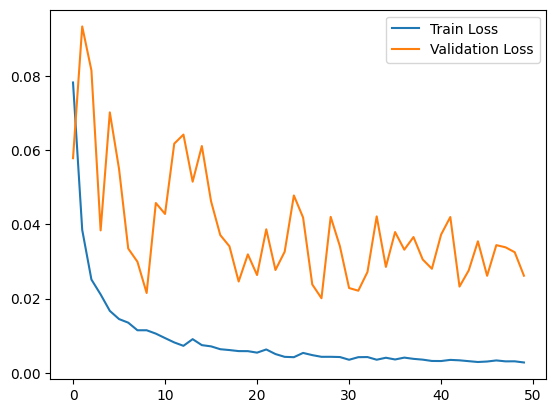

6/6 [==============================] - 0s 1ms/step - loss: 0.0262
Test Loss: 0.02617938630282879


In [82]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

# Evaluate on test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


**Task 4: test**

Evaluate the model on the test set and display any change in accuracy over time, if any. Test for common issues found in deep learning models.


In [83]:
X_test.size  # Returns total number of elements

7680

6/6 [==============================] - 0s 3ms/step


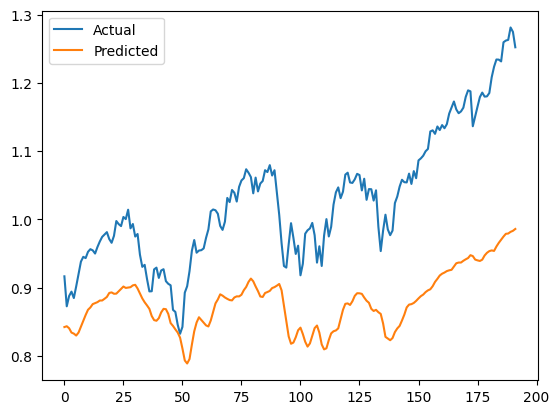

In [87]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming you've already scaled the target variable (y)
scaler_y = MinMaxScaler()

# Fit the scaler only on the target variable during training
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# Use the same scaler to transform the test target values
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# Now generate predictions (assumes the model has been trained)
predictions = model.predict(X_test)

# Inverse transform predictions using scaler_y (target variable scaler)
predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))

# Inverse transform y_test using the same scaler (target variable scaler)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Plot actual vs predicted values
plt.plot(y_test_actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()


In [88]:
# Save the trained RNN model
model.save("rnn_time_series.h5")

# Load the model later
from tensorflow.keras.models import load_model
model = load_model("rnn_time_series.h5")


C:\Users\noona\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Post (complete by Sunday 16/02/25)

Post your solution to Tasks 1-4 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should reference Task 5.

### Respond (complete by Wednesday 19/02/25)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: the rubrics for the e-tivity are here https://learn.ul.ie/d2l/lp/rubrics/preview.d2l?ou=49284&rubricId=2621&originTool=quicklinks


<a id='part2'></a>
## Sentiment Analysis


This task is a individual task and should **not** to be uploaded to the Group Locker. No posts should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

### Context

You have a model that predicts the sentiment of a film review (positive or negative) from the IMDB. There are two hyperparameters that format the data from IMDB: the maximum review length and the dictionary size. Below is a RNN model that predicts sentiment values. 


### Task 5:  (completed by Sunday 25/02/24)

Keeping top_words, max_review_lenngth and the embedding_vector_length the same, change the model so that it uses attention only, i.e. there are no recurrent components. The only Keras layers (defined here https://www.tensorflow.org/api_docs/python/tf/keras/layers) that you allowed to use are:
- Input,
- Embedding, 
- Dense, 
- Any Attention (must be at leat one),
- TimeDistributed,
- Any Merging,
- Any Reshaping,
- Any Pooling,
- Dropout. 

You need not use any of the layers (except attention) but you can use some more than once. Can you do at least as good as the RNN example?

**NB** There are many examples of using attention for sentiment analysis but we looking to see if you can construct a sensible model. The model will be delibrately restricted, so do not waste too much time achieving spectacular accuracy. Remember the rules of thumb that we discussed in the Introduction to DL module.


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

top_words = 100
(Rev_train, Sc_train), (Rev_test, Sc_test) = imdb.load_data(num_words=top_words)

max_review_length = 500
X_train = sequence.pad_sequences(Rev_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(Rev_test, maxlen=max_review_length)
print(X_train.shape)

In [ ]:
embedding_vector_length = 16
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(10))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())
plot_model(model_imdb,show_shapes=True)


The history for the model above has been saved, as it takes a while to run. If you want to run it yourself then comment out the second line.


In [ ]:
nepoch = 150
#IMDB_history = model_imdb.fit(X_train,Sc_train,validation_data=(X_test,Sc_test),epochs=nepoch,batch_size=256)
IMDB_history=np.load('IMDBTrainhist.npy',allow_pickle='TRUE').item()
plt.plot(range(nepoch),IMDB_history['loss'],c='r')
plt.plot(range(nepoch),IMDB_history['val_loss'],c='b')
plt.plot()

In [ ]:
plt.plot(range(nepoch),IMDB_history['accuracy'],c='r')
plt.plot(range(nepoch),IMDB_history['val_accuracy'],c='b')
plt.plot()

### Final Submission (complete by Sunday 23/02/25)

Submit Tasks 1-5 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above 

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.